# Ordinary Least Squares (OLS) Regression - Code Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# --- 1. Generate Sample Data ---
np.random.seed(42) # for reproducibility

hours_studied = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
exam_score = 50 + 4 * hours_studied + np.random.normal(0, 5, len(hours_studied))

print("--- Original Data ---")
for i in range(len(hours_studied)):
    print(f"Hours Studied: {hours_studied[i]:.2f}, Exam Score: {exam_score[i]:.2f}")
print("-" * 30)

--- Original Data ---
Hours Studied: 2.00, Exam Score: 60.48
Hours Studied: 3.00, Exam Score: 61.31
Hours Studied: 4.00, Exam Score: 69.24
Hours Studied: 5.00, Exam Score: 77.62
Hours Studied: 6.00, Exam Score: 72.83
Hours Studied: 7.00, Exam Score: 76.83
Hours Studied: 8.00, Exam Score: 89.90
Hours Studied: 9.00, Exam Score: 89.84
Hours Studied: 10.00, Exam Score: 87.65
Hours Studied: 11.00, Exam Score: 96.71
Hours Studied: 12.00, Exam Score: 95.68
------------------------------


In [3]:
# --- 2. Calculate Means (X-bar and Y-bar) - Useful for manual OLS comparison ---
mean_x = np.mean(hours_studied)
mean_y = np.mean(exam_score)

print(f"Mean of X (hours_studied): {mean_x:.2f}")
print(f"Mean of Y (exam_score): {mean_y:.2f}")
print("-" * 30)

Mean of X (hours_studied): 7.00
Mean of Y (exam_score): 79.83
------------------------------


For simple linear regression, the OLS estimators are:

$$\hat{\beta_1} = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2} = \frac{Cov(X, Y)}{Var(X)}$$

$$\hat{\beta_0} = \bar{Y} - \hat{\beta_1} \bar{X}$$

In [4]:
# --- 3. Manual OLS Coefficient Calculation ---
numerator_beta1 = np.sum((hours_studied - mean_x) * (exam_score - mean_y))
denominator_beta1 = np.sum((hours_studied - mean_x)**2)
beta_1_hat_manual = numerator_beta1 / denominator_beta1
beta_0_hat_manual = mean_y - beta_1_hat_manual * mean_x

print("--- Manual OLS Coefficients ---")
print(f"Estimated Slope (beta_1_hat_manual): {beta_1_hat_manual:.2f}")
print(f"Estimated Intercept (beta_0_hat_manual): {beta_0_hat_manual:.2f}")
print("-" * 30)

--- Manual OLS Coefficients ---
Estimated Slope (beta_1_hat_manual): 3.77
Estimated Intercept (beta_0_hat_manual): 53.46
------------------------------


In [5]:
# --- 4. Using scipy.optimize.curve_fit ---

# Define the linear function we want to fit: y = m*x + c
# The first argument 'x' is the independent variable.
# Subsequent arguments are the parameters we want to find (m for slope, c for intercept).
def linear_function(x, m, c):
    return m * x + c

# Use curve_fit to find the optimal parameters (m and c)
# popt contains the optimal parameters (m, c)
# pcov contains the covariance matrix of the parameters (useful for error estimation)
popt, pcov = curve_fit(linear_function, hours_studied, exam_score)

# Extract the fitted parameters
beta_1_hat_curvefit = popt[0] # This is our slope (m)
beta_0_hat_curvefit = popt[1] # This is our intercept (c)

print("--- SciPy curve_fit Coefficients ---")
print(f"Estimated Slope (beta_1_hat_curvefit): {beta_1_hat_curvefit:.3f}")
print(f"Estimated Intercept (beta_0_hat_curvefit): {beta_0_hat_curvefit:.3f}")
print("-" * 30)

--- SciPy curve_fit Coefficients ---
Estimated Slope (beta_1_hat_curvefit): 3.767
Estimated Intercept (beta_0_hat_curvefit): 53.457
------------------------------


In [6]:
# --- 4.1. Calculate Parameter Errors from Covariance Matrix ---

# The diagonal elements of pcov are the variances of the parameters
# Standard errors are the square roots of the variances
param_errors = np.sqrt(np.diag(pcov))

slope_error = param_errors[0]     # Error in slope (m)
intercept_error = param_errors[1] # Error in intercept (c)

print("--- Parameter Errors from Covariance Matrix ---")
print(f"Slope Error (±): {slope_error:.3f}")
print(f"Intercept Error (±): {intercept_error:.3f}")
print()
print("--- Final Results with Uncertainties ---")
print(f"Slope = {beta_1_hat_curvefit:.3f} ± {slope_error:.3f}")
print(f"Intercept = {beta_0_hat_curvefit:.3f} ± {intercept_error:.3f}")
print()
print("--- Covariance Matrix ---")
print("pcov =")
print(pcov)
print("-" * 50)

--- Parameter Errors from Covariance Matrix ---
Slope Error (±): 0.363
Intercept Error (±): 2.789

--- Final Results with Uncertainties ---
Slope = 3.767 ± 0.363
Intercept = 53.457 ± 2.789

--- Covariance Matrix ---
pcov =
[[ 0.13184348 -0.92290437]
 [-0.92290437  7.77876547]]
--------------------------------------------------


In [7]:
# --- 5. Make Predictions with both methods ---
predicted_exam_score_manual = beta_0_hat_manual + beta_1_hat_manual * hours_studied
predicted_exam_score_curvefit = linear_function(hours_studied, *popt) # Unpack popt into m and c

In [8]:
# --- 6. Calculate R^2 for curve_fit results (should be very similar to manual OLS) ---
# Residual Sum of Squares (RSS) for curve_fit
rss_curvefit = np.sum((exam_score - predicted_exam_score_curvefit)**2)

# Total Sum of Squares (TSS) remains the same
tss = np.sum((exam_score - mean_y)**2)

r_squared_curvefit = 1 - (rss_curvefit / tss)

print(f"R^2 using curve_fit: {r_squared_curvefit:.4f}")
print("-" * 30)

R^2 using curve_fit: 0.9228
------------------------------


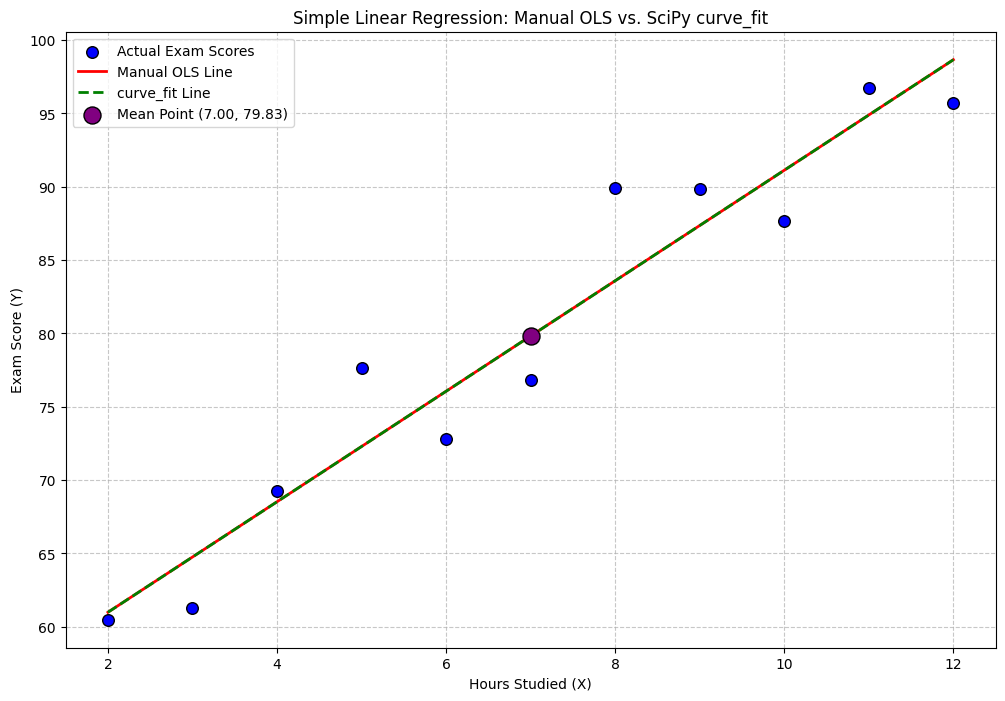

In [9]:
# --- 7. Visualize the Results ---
plt.figure(figsize=(12, 8))

# Plot actual data points
plt.scatter(hours_studied, exam_score, color='blue', label='Actual Exam Scores', s=70, edgecolors='k', zorder=3)

# Plot the manual OLS regression line
plt.plot(hours_studied, predicted_exam_score_manual, color='red', linestyle='-', label='Manual OLS Line', linewidth=2)

# Plot the curve_fit regression line
plt.plot(hours_studied, predicted_exam_score_curvefit, color='green', linestyle='--', label='curve_fit Line', linewidth=2)

# Plot the mean point (X_bar, Y_bar)
plt.scatter(mean_x, mean_y, color='purple', marker='o', s=150, zorder=5, label=f'Mean Point ({mean_x:.2f}, {mean_y:.2f})', edgecolors='k')

plt.title('Simple Linear Regression: Manual OLS vs. SciPy curve_fit')
plt.xlabel('Hours Studied (X)')
plt.ylabel('Exam Score (Y)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()